In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete, rv_histogram, binom
import pandas as pd
import seaborn as sns
from   statsmodels.distributions.empirical_distribution import ECDF



In [12]:
reservas = [0,1,2,3,4,5,6,7,8,9,10]
prob_res = [0.02, 0.05, 0.08, 0.16, 0.26, 0.18, 0.11, 0.07, 0.05, 0.01, 0.01]
trials = 5000

In [13]:
seed = 1234
ingreso_c = [2000, 2000, 1500, 1500]
prob_c=[0.25, 0.25, 0.4, 0.4]
min_reunion_c = [3,1,3,1]

In [14]:
#Entradas inciertas 
def gen_reservas():
    c_reservas = rv_discrete(name='reservas', values=(reservas, prob_res))
    return reservas[c_reservas.rvs(size=1)[0]]
print(gen_reservas())

4


In [15]:
def simular(ingresos_c, prob_c, min_reunion_c):
    nro_reservas = gen_reservas()
    if nro_reservas < min_reunion_c:
        nro_cirugias = 0
    else:
        nro_cirugias = binom.rvs(n=nro_reservas, p=prob_c, size=1)[0]
    ingresos_s = nro_cirugias*ingresos_c
    
    return ingresos_s

In [17]:
resultados = {}
for ingresos, prob, reunion in zip(ingreso_c, prob_c, min_reunion_c):
    #print(ingresos, prob, reunion)
    vector_utilidades = []
    for i in range(trials):
        vector_utilidades.append(simular(ingresos, prob, reunion))
        #print(vector_utilidades)
    Key = 'Ingresos: ' + str(ingresos) + ' Prob: ' + str(prob) + ' Reunion: ' + str(reunion)
    resultados[Key] = vector_utilidades
    print(f'Ingresos: {ingresos} Prob: {prob} Reunion: {reunion} Minimo de reunion: {np.mean(vector_utilidades)}')

Ingresos: 2000 Prob: 0.25 Reunion: 3 Minimo de reunion: 2109.6
Ingresos: 2000 Prob: 0.25 Reunion: 1 Minimo de reunion: 2175.6
Ingresos: 1500 Prob: 0.4 Reunion: 3 Minimo de reunion: 2460.0
Ingresos: 1500 Prob: 0.4 Reunion: 1 Minimo de reunion: 2612.1


Ingresos: 2000 Prob: 0.25 Reunion: 3: 2109.6
Ingresos: 2000 Prob: 0.25 Reunion: 1: 2175.6
Ingresos: 1500 Prob: 0.4 Reunion: 3: 2460.0
Ingresos: 1500 Prob: 0.4 Reunion: 1: 2612.1
P(x<=2000) en (ejemplo_key): 0.4690


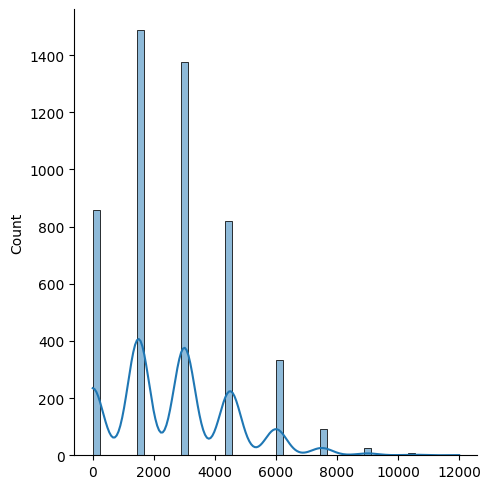

In [24]:
val_resultados = {}
ecdf_resultados = {}
hist_resultados = {}
for key, values in resultados.items():
    ecdf = ECDF(values)
    hist = np.histogram(values, bins="sturges", density=True)
    hist_dist = rv_histogram(hist)
    ecdf_resultados[key] = ecdf 
    hist_resultados[key] = hist_dist
    val_resultados[key] = values
    print(f'{key}: {np.mean(values)}')
    
ejemplo_key = list(hist_resultados.keys())[3]
hist_funcion = hist_resultados[ejemplo_key]
val_funcion = val_resultados[ejemplo_key]
ecdf_funcion = ecdf_resultados[ejemplo_key]
probabilidad = ecdf_funcion(2000)
print(f'P(x<=2000) en (ejemplo_key): {probabilidad:.4f}')
sns.displot(val_funcion, bins=50,  kde=True)
